In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [4]:
#%matplotlib inline

In [5]:
writeDir = "write/"

fileName = "Pelka2021_Colorectal"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

# Read In Data

In [11]:
inDir = f'data/{fileName}'

inputGenesFile = f'{inDir}/Genes.txt'
genes =  pd.read_table(inputGenesFile, delimiter=",", index_col=0, header=None)
genes.index.names = ['genes']
genes

Empty DataFrame
Columns: []
Index: [RP11-34P13.3, FAM138A, OR4F5, RP11-34P13.7, RP11-34P13.8, AL627309.1, RP11-34P13.14, RNU6-1100P, RP11-34P13.9, AP006222.2, OR4F29, RP4-669L17.2, RP5-857K21.15, RP5-857K21.2, OR4F16, RP11-206L10.3, RNU6-1199P, RP11-206L10.4, RP11-206L10.9, AL669831.1, FAM87B, NCRNA00115, FAM41C, AL645608.2, RP11-54O7.16, RP11-54O7.1, RP11-54O7.2, RP11-54O7.3, SAMD11, AL645608.1, NOC2L, KLHL17, PLEKHN1, PERM1, RP11-54O7.17, HES4, ISG15, RP11-54O7.11, AGRN, RP11-54O7.18, RNF223, C1orf159, RP11-465B22.5, MIR200B, MIR200A, MIR429, RP11-465B22.8, RP11-465B22.6, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, RP5-902P8.12, UBE2J2, RP5-902P8.10, SCNN1D, ACAP3, PUSL1, INTS11, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20, RN7SL657P, RP4-758J18.13, ANKRD65, RP4-758J18.7, TMEM88B, RP4-758J18.10, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, RP5-832C2.5, C1orf233, RP11-345P4.9, MIB2, MMP23B, CDK11B, RP11-345P4.10, SLC35E2B, CDK11A, SLC35E2, NADK, GNB1, RP1-140A9.1, CALML6, TMEM52, CFAP74, RP11-547D24.1, GABRD, RP11-547D24.3, PRKCZ, ...]

[43113 rows x 0 columns]

In [17]:
def readAdata(inDir, sufix, genes):
    print(sufix)
    inputCellsFile = f'{inDir}/Cells{sufix}.csv'
    inputMtxFile = f'{inDir}/Exp_data_UMIcounts{sufix}.mtx'

    cells =  pd.read_table(inputCellsFile, delimiter=",", index_col=0)

    
    adata = sc.read_mtx(inputMtxFile).T
    
    adata.obs = cells
    adata.var = genes
    
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata = adata[adata.obs.cell_type=="Malignant"]
    return(adata)

readAdata(f'{inDir}/Group1',"1",genes)

1


View of AnnData object with n_obs × n_vars = 22631 × 43113
    obs: 'sample', 'cell_type', 'cell_subtype', 'sample_type', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize', 'SizeQuantile', 'PID', 'Sex', 'Age', 'Ethnicity', 'Race', 'complexity'

In [19]:
adatas = [readAdata(f'{inDir}/Group{str(i+1)}',str(i+1),genes) for i in range(2)]

1
2


In [20]:
inMetaFile = f'{inDir}/Meta-data.csv'
meta =  pd.read_table(inMetaFile, delimiter=",", index_col=0, header=0)
meta

patient        cancer_type technology  n_cells sample_type  \
sample                                                               
C103_T     C103  Colorectal Cancer        10x     6096       Tumor   
C104_T     C104  Colorectal Cancer        10x     2886       Tumor   
C105_T     C105  Colorectal Cancer        10x     3281       Tumor   
C106_N     C106  Colorectal Cancer        10x     1466      Normal   
C106_T     C106  Colorectal Cancer        10x     1926       Tumor   
...         ...                ...        ...      ...         ...   
C170_T     C170  Colorectal Cancer        10x    10054       Tumor   
C171_TA    C171  Colorectal Cancer        10x    10709       Tumor   
C171_TB    C171  Colorectal Cancer        10x     5490       Tumor   
C172_T     C172  Colorectal Cancer        10x     1542       Tumor   
C173_T     C173  Colorectal Cancer        10x     2649       Tumor   

            HistologicTypeSimple MSIStatus                  MMR_IHC MMRStatus  \
sample                                                                          
C103_T            Adenocarcinoma       MSS                preserved      MMRp   
C104_T            Adenocarcinoma       MSS                preserved      MMRp   
C105_T            Adenocarcinoma       MSS                preserved      MMRp   
C106_N              Normal colon       NaN                      NaN       NaN   
C106_T   Adenocarcinoma;Mucinous       MSI  MLH1 and PMS2 deficient      MMRd   
...                          ...       ...                      ...       ...   
C170_T            Adenocarcinoma       MSI  MLH1 and PMS2 deficient      MMRd   
C171_TA           Adenocarcinoma       MSS                preserved      MMRp   
C171_TB           Adenocarcinoma       MSS                preserved      MMRp   
C172_T            Adenocarcinoma       MSS                preserved      MMRp   
C173_T            Adenocarcinoma       MSI  MLH1 and PMS2 deficient      MMRd   

         MLH1Status  ... NodeStatus_detailed NodeStatusSimple  \
sample               ...                                        
C103_T   MLH1NoMeth  ...                  N0             Nneg   
C104_T   MLH1NoMeth  ...                  N0             Nneg   
C105_T   MLH1NoMeth  ...                 N1a             Npos   
C106_N          NaN  ...                 NaN              NaN   
C106_T     MLH1Meth  ...                  N0             Nneg   
...             ...  ...                 ...              ...   
C170_T     MLH1Meth  ...                  N0             Nneg   
C171_TA  MLH1NoMeth  ...                  N0             Nneg   
C171_TB  MLH1NoMeth  ...                  N0             Nneg   
C172_T   MLH1NoMeth  ...                  N0             Nneg   
C173_T     MLH1Meth  ...                 N2b             Npos   

         MetastasisStatus TumorSize SizeQuantile   PID Sex Age Ethnicity  \
sample                                                                     
C103_T   not entered (Mx)       2.5          1.0  C103   M  45        No   
C104_T   not entered (Mx)       4.0          2.0  C104   M  81        No   
C105_T   not entered (Mx)       4.7          2.0  C105   M  71        No   
C106_N                NaN       NaN          NaN  C106   M  67        No   
C106_T   not entered (Mx)       4.6          2.0  C106   M  67        No   
...                   ...       ...          ...   ...  ..  ..       ...   
C170_T   not entered (Mx)       6.3          3.0  C170   F  77        No   
C171_TA  not entered (Mx)       3.2          1.0  C171   M  61        No   
C171_TB  not entered (Mx)       3.2          1.0  C171   M  61        No   
C172_T   not entered (Mx)       5.0          3.0  C172   F  61        No   
C173_T   not entered (Mx)       9.8          4.0  C173   F  49        No   

                              Race  
sample                              
C103_T                       Asian  
C104_T                       White  
C105_T                       White  
C106_N                 

In [21]:
meta.iloc[:,10:20]

MMRMLH1Tumor            TissueSite_detailed TissueSiteSimple  \
sample                                                                   
C103_T            MMRp     LEFT colon (sigmoid colon)             left   
C104_T            MMRp       RIGHT colon (transverse)            right   
C105_T            MMRp  RIGHT colon (ascending colon)            right   
C106_N             NaN            RIGHT colon (cecum)            right   
C106_T   MMRd_MLH1Meth            RIGHT colon (cecum)            right   
...                ...                            ...              ...   
C170_T   MMRd_MLH1Meth              Right (ascending)            right   
C171_TA           MMRp                    RIGHT colon            right   
C171_TB           MMRp                    RIGHT colon            right   
C172_T            MMRp              RIGHT (ascending)            right   
C173_T   MMRd_MLH1Meth               LEFT(descending)             left   

                                  HistologicGrade_detailed  \
sample                                                       
C103_T   Low-grade (well differentiated to moderately d...   
C104_T   Low-grade (well differentiated to moderately d...   
C105_T   Low Grade (Well differentiated or Moderately d...   
C106_N                                                 NaN   
C106_T   Low Grade (Well differentiated or Moderately d...   
...                                                    ...   
C170_T                  Grade 2 (Moderately differntiated)   
C171_TA                 Grade 2 (Moderately differntiated)   
C171_TB                 Grade 2 (Moderately differntiated)   
C172_T                  Grade 2 (Moderately differntiated)   
C173_T   Grade 3 (Poorly differentiated. < 50% gland fo...   

        HistologicGradeSimple TumorStage NodeStatus_detailed NodeStatusSimple  \
sample                                                                          
C103_T                    low        pT2                  N0             Nneg   
C104_T                    low        pT3                  N0             Nneg   
C105_T                    low       pT4a                 N1a             Npos   
C106_N                    NaN        NaN                 NaN              NaN   
C106_T                    low       pT4a                  N0             Nneg   
...                       ...        ...                 ...              ...   
C170_T                    low        pT3                  N0             Nneg   
C171_TA                   low        pT2                  N0             Nneg   
C171_TB                   low        pT2                  N0             Nneg   
C172_T                    low        pT3                  N0             Nneg   
C173_T                   high       pT4a                 N2b             Npos   

         MetastasisStatus  TumorSize  
sample                                
C103_T   not entered (Mx)        2.5  
C104_T   not entered (Mx)        4.0  
C105_T   not entered (Mx)        4.7  
C106_N                NaN        NaN  
C106_T   not entered (Mx)        4.6  
...                   ...        ...  
C170_T   not entered (Mx)        6.3  
C171_TA  not entered (Mx)        3.2  
C171_TB  not entered (Mx)        3.2  
C172_T   not entered (Mx)        5.0  
C173_T   not entered (Mx)        9.8  

[100 rows x 10 columns]

In [22]:
adata = an.concat(adatas, label="group", keys=["1","2"])
adata

AnnData object with n_obs × n_vars = 44090 × 43113
    obs: 'sample', 'cell_type', 'cell_subtype', 'sample_type', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize', 'SizeQuantile', 'PID', 'Sex', 'Age', 'Ethnicity', 'Race', 'complexity', 'group'

# QC

normalizing counts per cell
    finished (0:00:00)


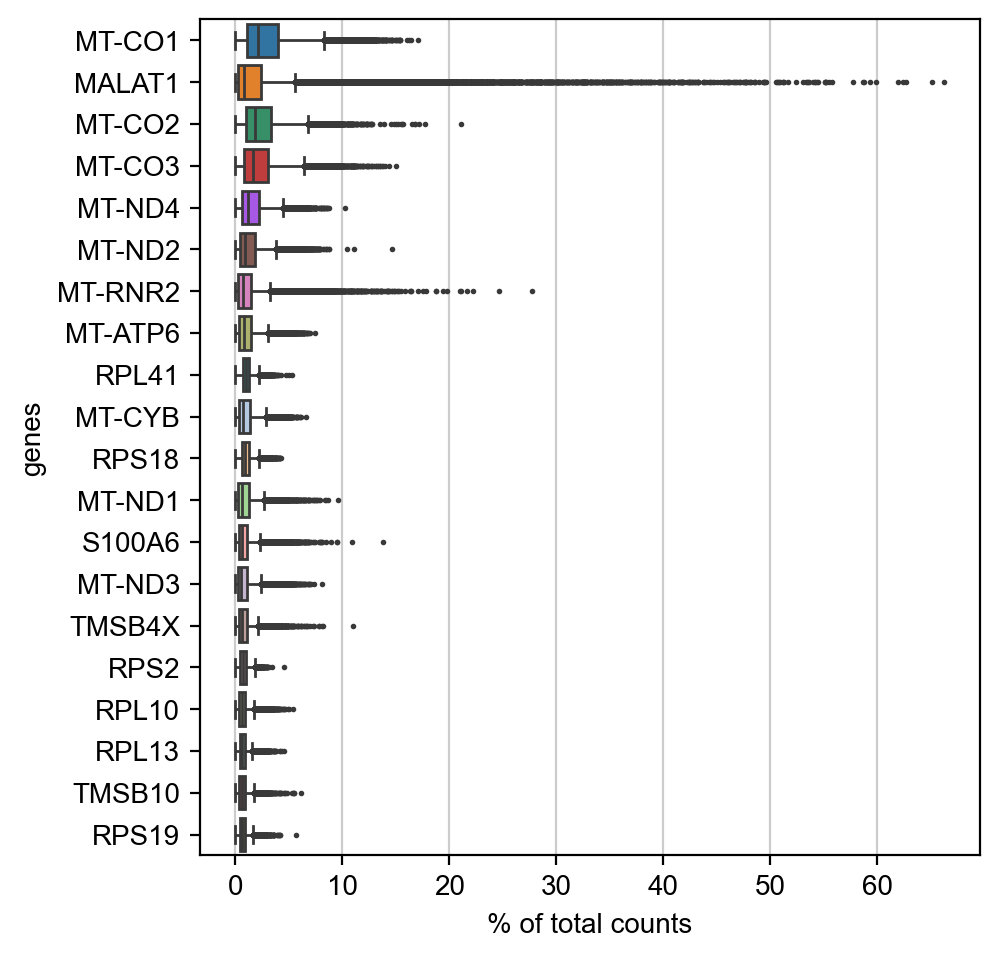

In [25]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_2157564/2229519540.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


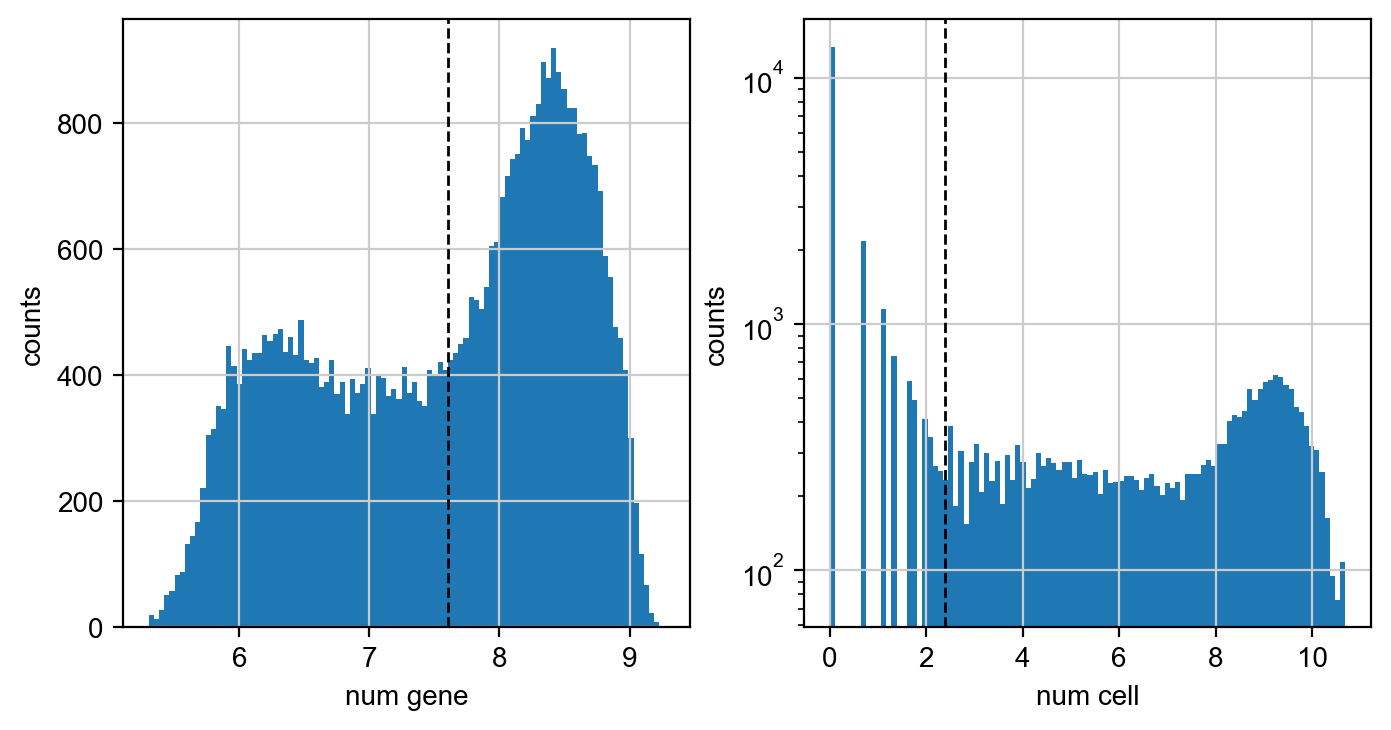

In [28]:
valX = adata.X>0
minGenes=2000
minCells=10

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [29]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 19860 cells that have less than 2000 genes expressed
filtered out 20039 genes that are detected in less than 10 cells


In [30]:
adata = adata[:,np.logical_not(adata.var_names=="MALAT1")]

## Mito QC

In [31]:
for g in adata.var_names:
    if "MT-" == g[:2]:
        print(g)

In [32]:
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], log1p = False, inplace=True)

/tmp/ipykernel_2157564/2933791377.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


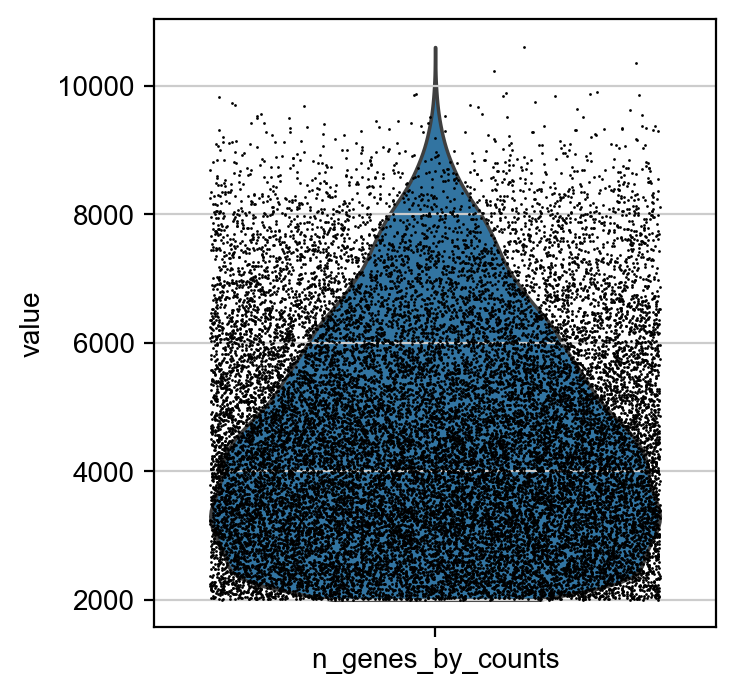

In [33]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


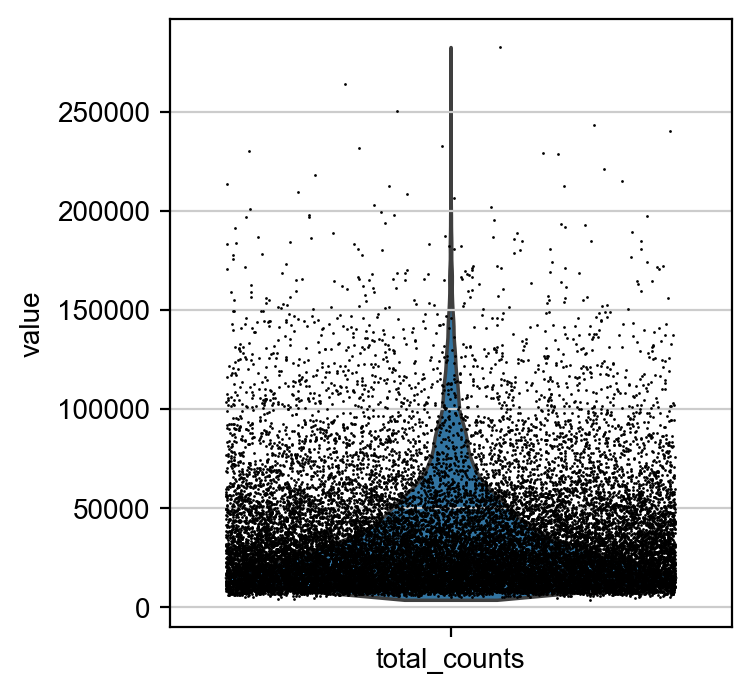

In [34]:
sc.pl.violin(adata, ['total_counts'], jitter=0.4)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


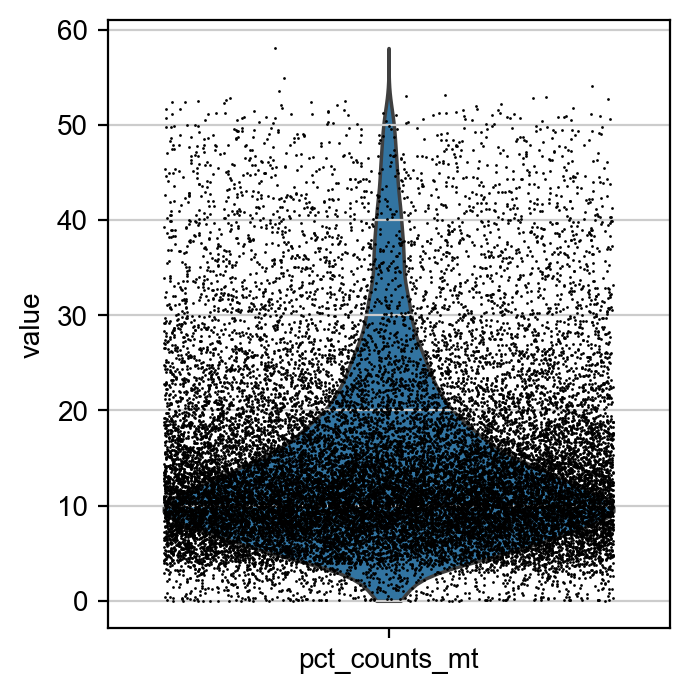

In [35]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

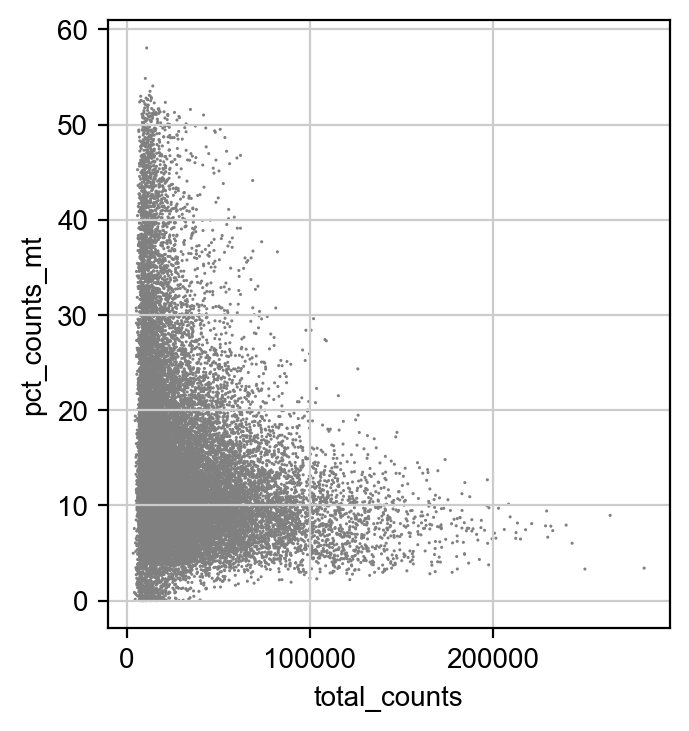

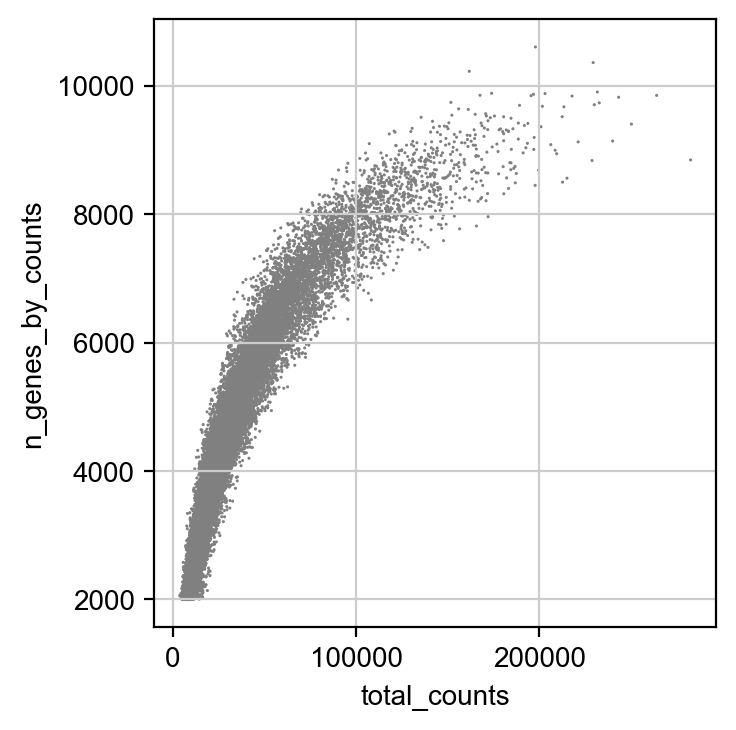

In [36]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [37]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :]
adata = adata[adata.obs.total_counts < 100000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]

save post QC scanpy

In [38]:
adata

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


View of AnnData object with n_obs × n_vars = 14944 × 23073
    obs: 'sample', 'cell_type', 'cell_subtype', 'sample_type', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize', 'SizeQuantile', 'PID', 'Sex', 'Age', 'Ethnicity', 'Race', 'complexity', 'group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [39]:
resultsFileQC

'write/Pelka2021_Colorectal_QC.h5ad'

In [40]:
adata.write(resultsFileQC)

# Analysis

In [41]:
resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

Set figure parameters

In [42]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [43]:
adata = sc.read(resultsFileQC)
adata

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 14944 × 23073
    obs: 'sample', 'cell_type', 'cell_subtype', 'sample_type', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize', 'SizeQuantile', 'PID', 'Sex', 'Age', 'Ethnicity', 'Race', 'complexity', 'group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [44]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [45]:
sc.pp.log1p(adata)

In [46]:
sc.pp.highly_variable_genes(adata)#, flavor = "seurat", n_top_genes=2000)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


extracting highly variable genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
1714


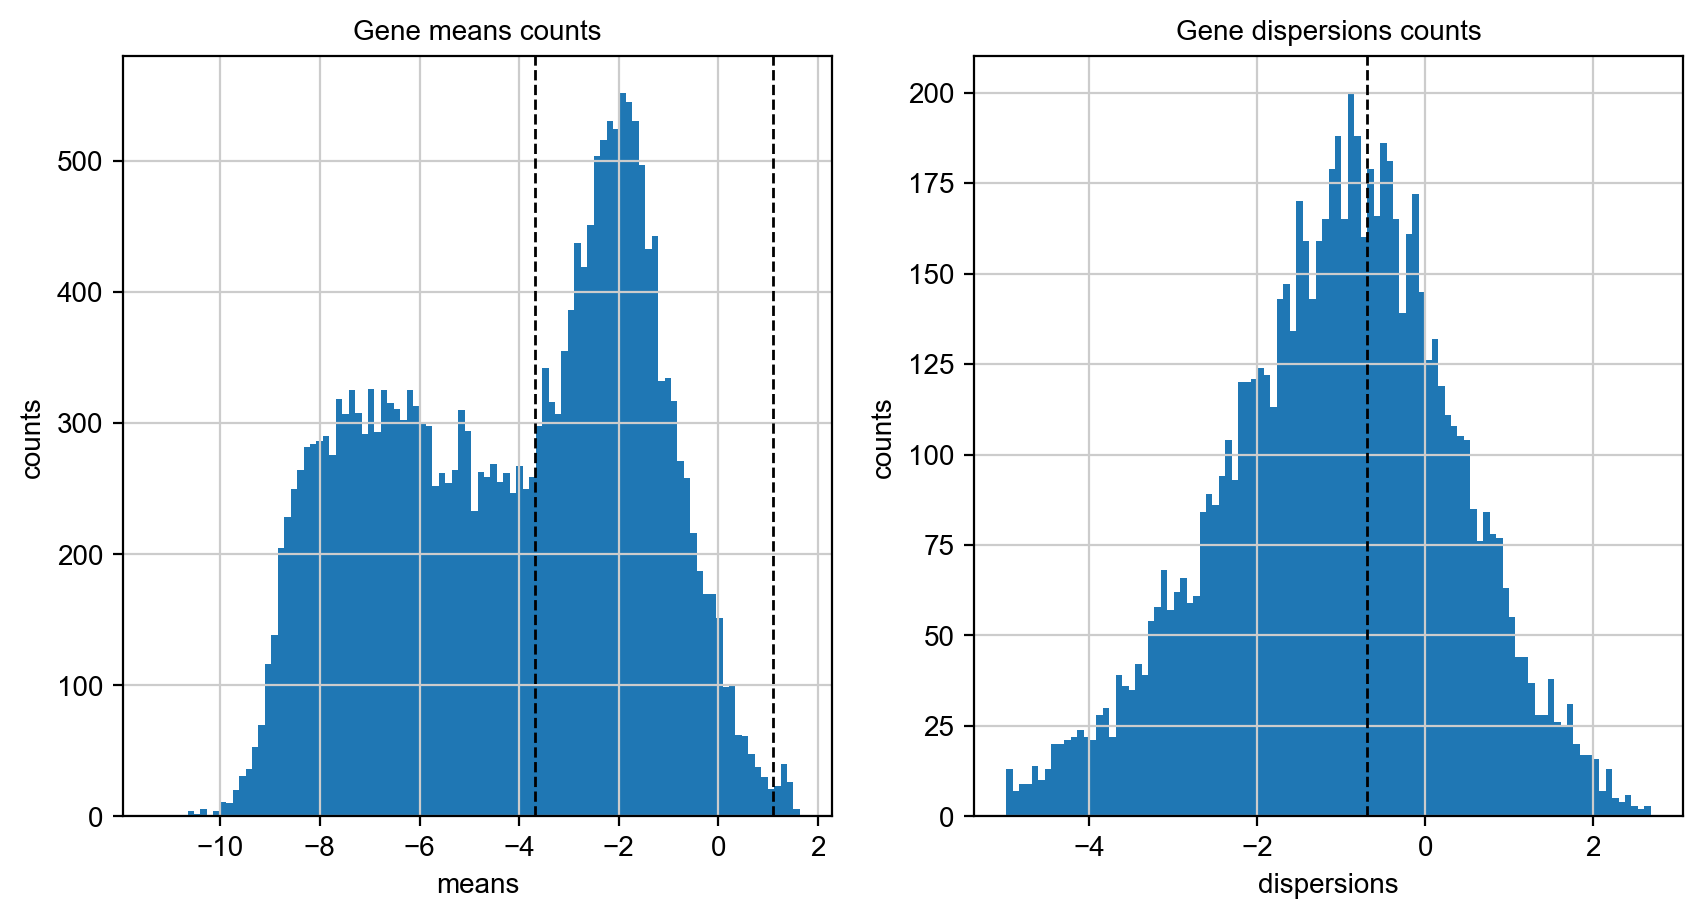

In [47]:
minMean = 0.025
maxMean = 3
minDisp = 0.5

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = adata.var[["means"]][adata.var[["means"]] > np.exp(-14)]#adata.var[["means"]],
axs[0].hist(np.log(means), bins=100)#, log=True),
axs[0].axvline(np.log(minMean), color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(np.log(maxMean), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Gene means counts')
axs[0].set_xlabel('means')
axs[0].set_ylabel('counts')

dispNorm = adata.var[["dispersions_norm"]][adata.var[["dispersions_norm"]] > np.exp(-5)]#adata.var[["means"]],
axs[1].hist(np.log(dispNorm), bins=100)#, log=True),
axs[1].axvline(np.log(minDisp), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Gene dispersions counts')
axs[1].set_xlabel('dispersions')
axs[1].set_ylabel('counts')

sc.pp.highly_variable_genes(adata, min_disp=minDisp, min_mean=minMean, max_mean=maxMean)
print(sum(adata.var.highly_variable))

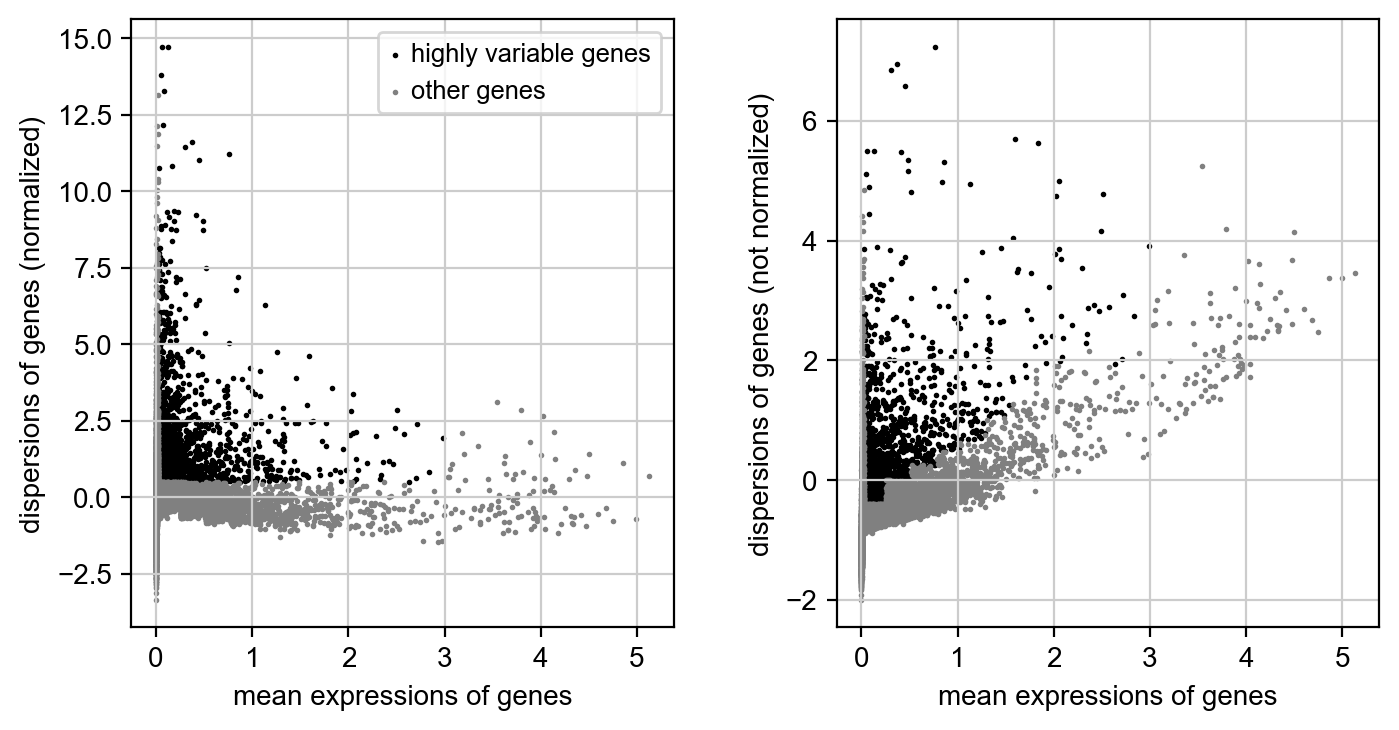

In [48]:
sc.pl.highly_variable_genes(adata)

In [52]:
#for inGene in adata.var[-8:].index.tolist():
#    adata.var.loc[inGene,"highly_variable"] = False

In [53]:
adata.raw = adata

In [54]:
#adata = adata[:, adata.var.highly_variable]
adata = adata[:, np.logical_and(adata.var.highly_variable, np.logical_not(adata.var.mt))]

In [55]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [56]:
#sc.pp.scale(adata, max_value=10)

In [57]:
sc.tl.pca(adata, n_comps = 100, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=100


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished (0:00:03)


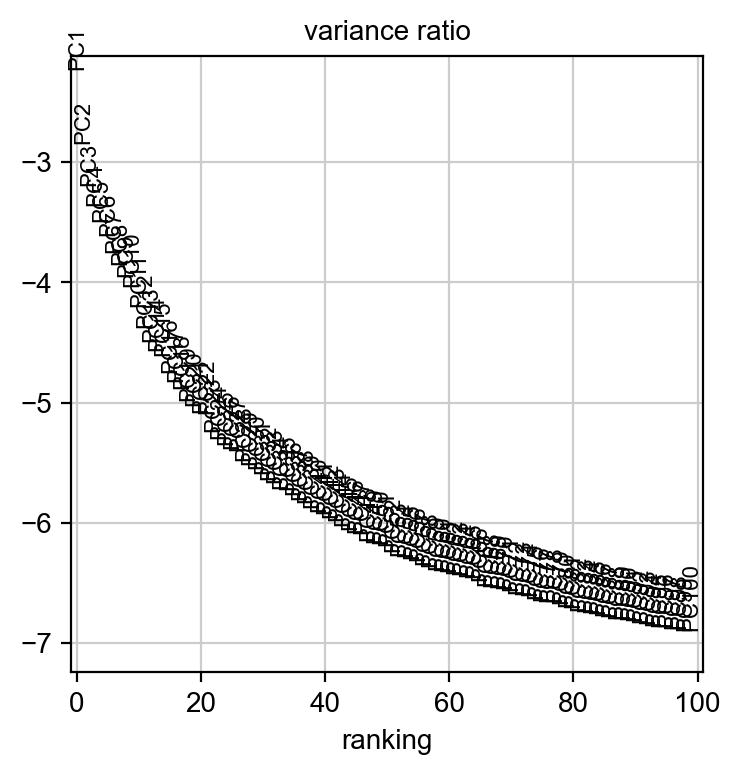

In [58]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100, log=True)

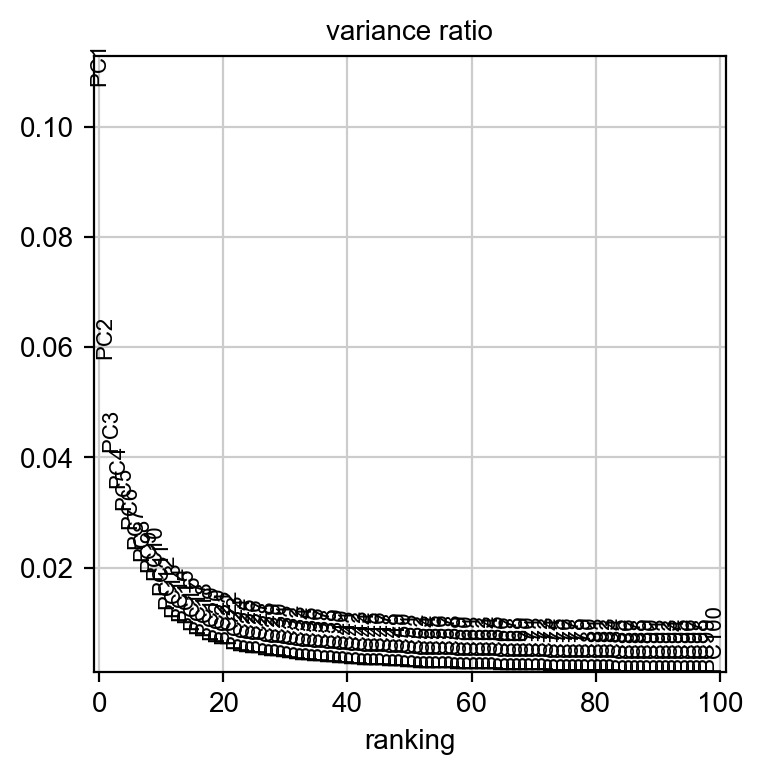

In [59]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100)

In [60]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)


In [61]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


In [62]:
sc.tl.leiden(adata, resolution=0.25)

running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [64]:
adata.obs["patient"] = [str(s) for s in adata.obs["sample"]]

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

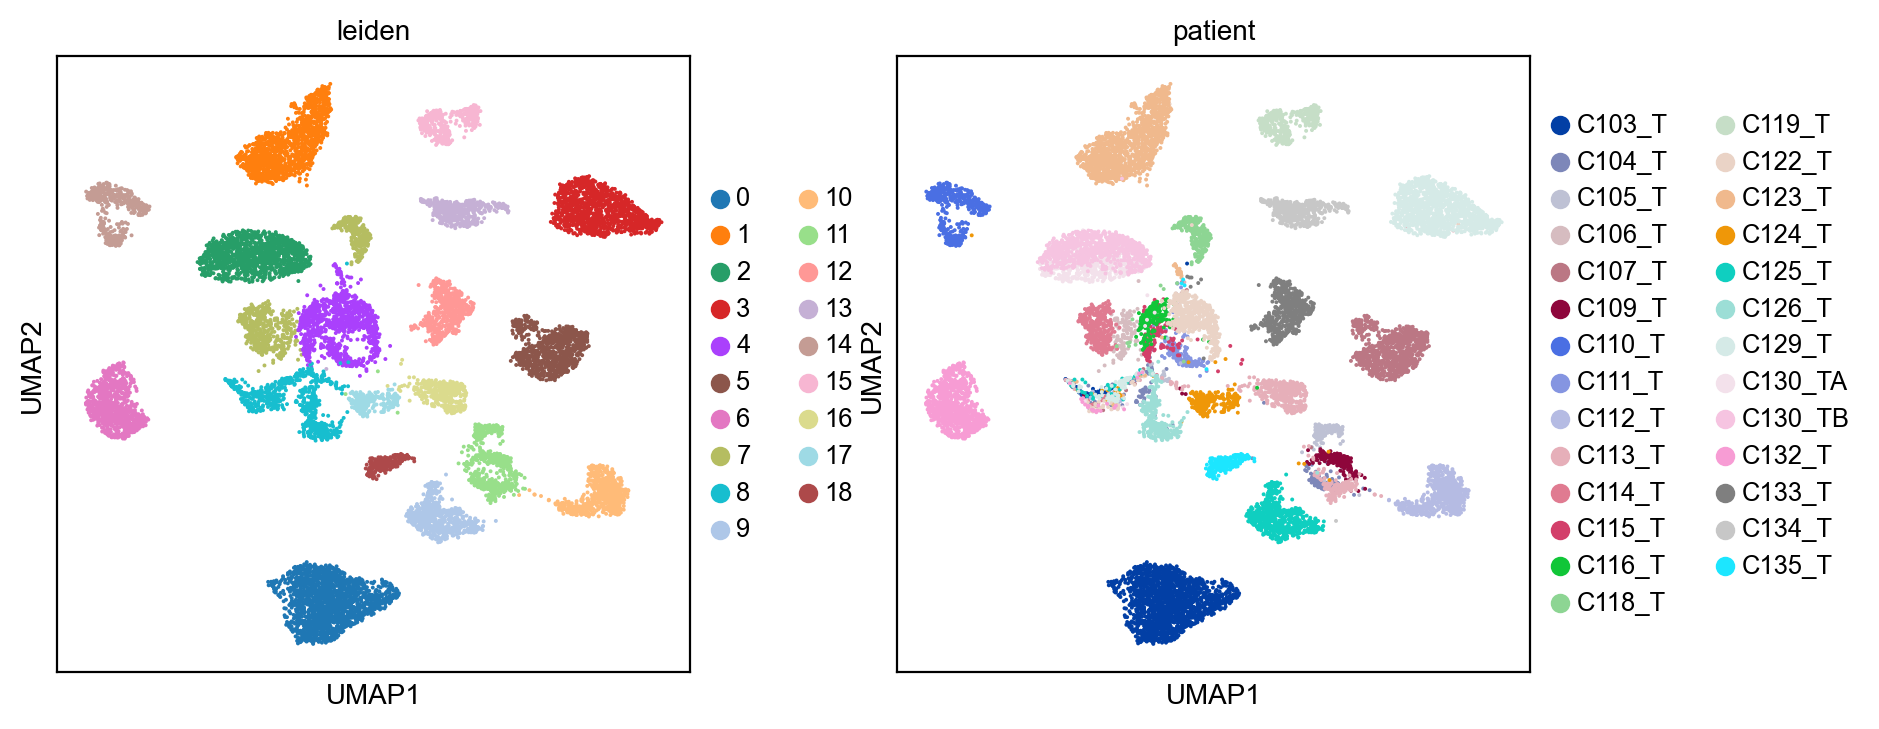

In [65]:
sc.pl.umap(adata, color=["leiden","patient"],ncols=2)

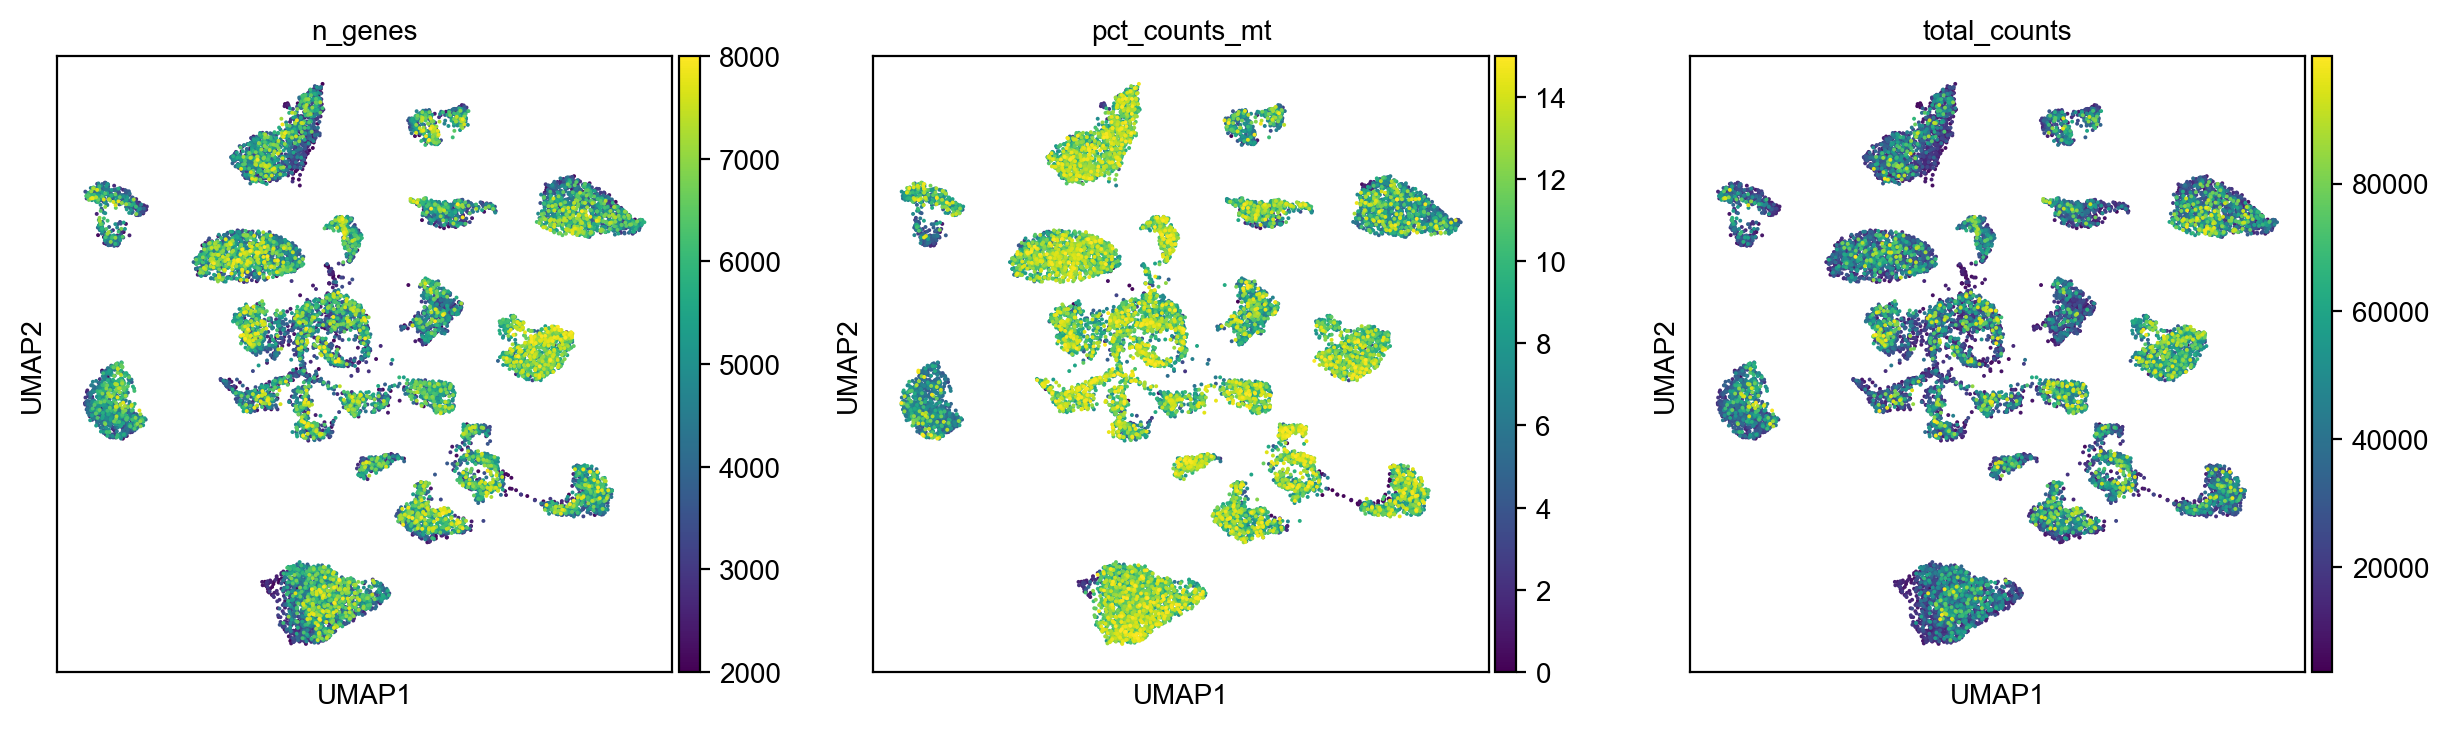

In [66]:
sc.pl.umap(adata, color=["n_genes","pct_counts_mt","total_counts"])

ranking genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


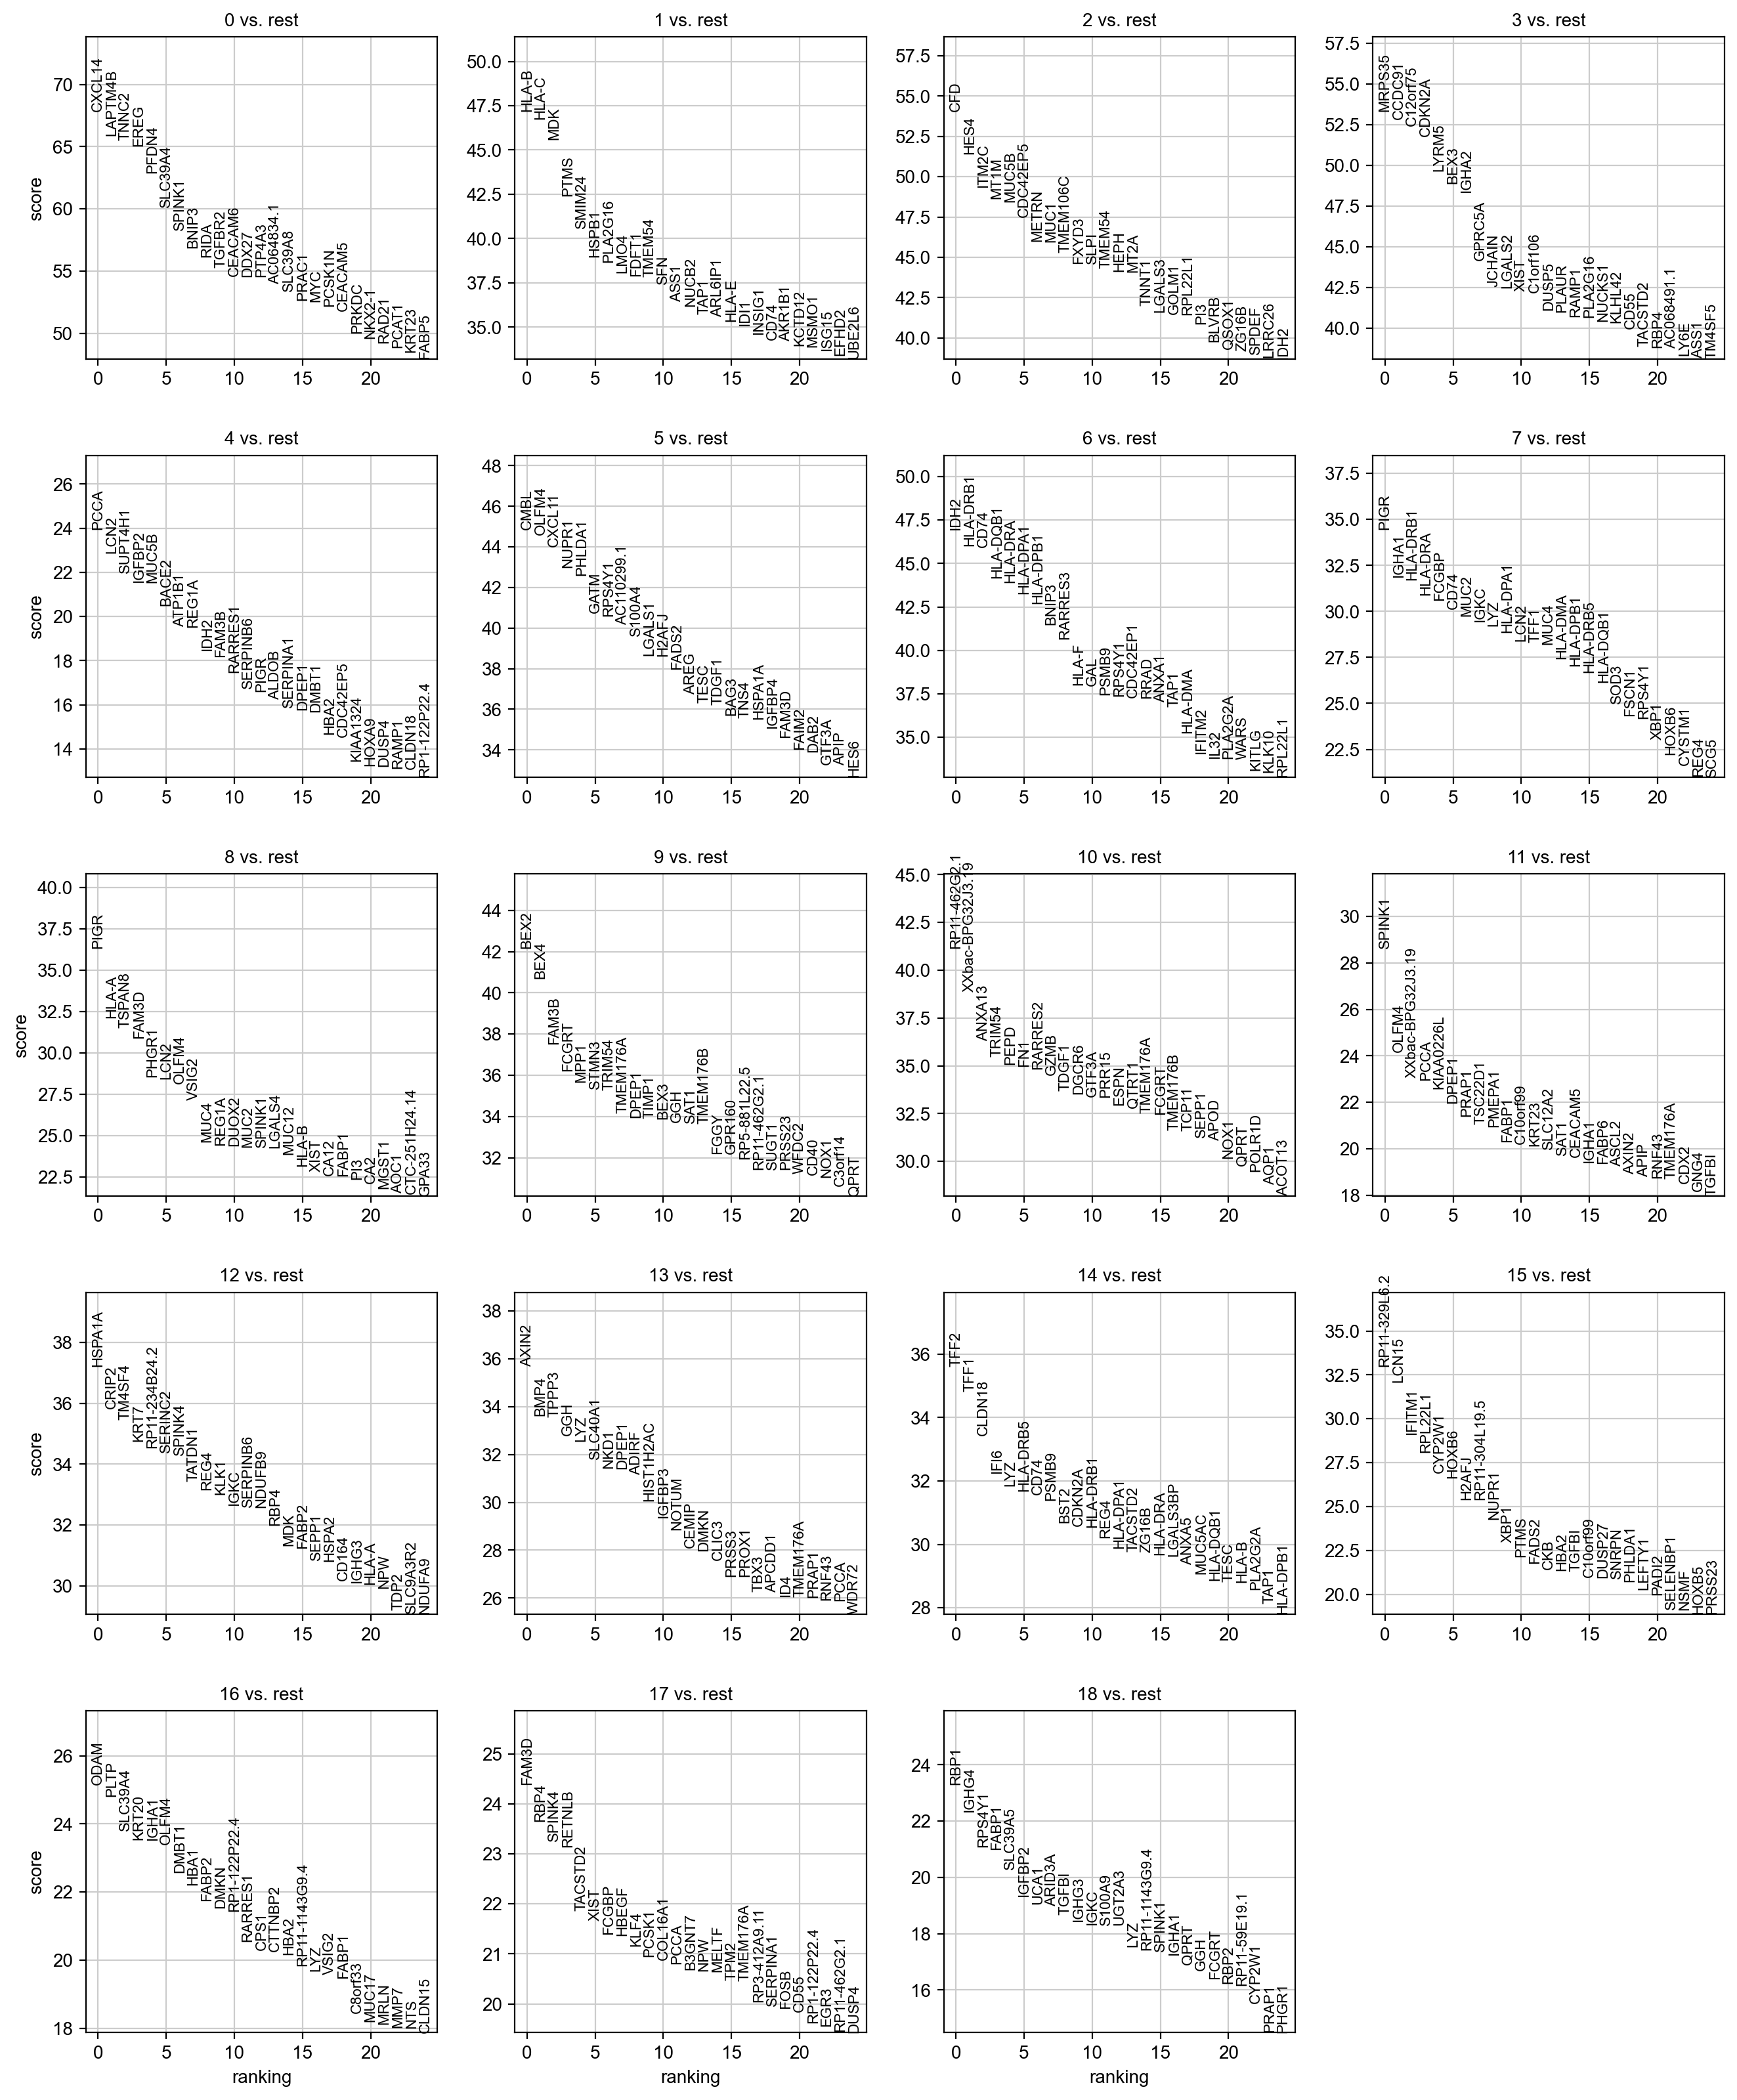

In [67]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
#sc.tl.filter_rank_genes_groups(adata, groupby="leiden", use_raw=False,
#                                   key_added='rank_genes_groups_filtered', 
#                                   min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5, compare_abs=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [68]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

0        1         2         3         4           5         6  \
0       CXCL14    HLA-B       CFD    MRPS35      PCCA        CMBL      IDH2   
1      LAPTM4B    HLA-C      HES4    CCDC91      LCN2       OLFM4  HLA-DRB1   
2        TNNC2      MDK     ITM2C  C12orf75   SUPT4H1      CXCL11      CD74   
3         EREG     PTMS      MT1M    CDKN2A    IGFBP2       NUPR1  HLA-DQB1   
4        PFDN4   SMIM24     MUC5B     LYRM5     MUC5B      PHLDA1   HLA-DRA   
5      SLC39A4    HSPB1  CDC42EP5      BEX3     BACE2        GATM  HLA-DPA1   
6       SPINK1  PLA2G16     METRN     IGHA2    ATP1B1      RPS4Y1  HLA-DPB1   
7        BNIP3     LMO4      MUC1    GPRC5A     REG1A  AC110299.1     BNIP3   
8         RIDA    FDFT1  TMEM106C    JCHAIN      IDH2      S100A4   RARRES3   
9       TGFBR2   TMEM54     FXYD3    LGALS2     FAM3B      LGALS1     HLA-F   
10     CEACAM6      SFN      SLPI      XIST   RARRES1       H2AFJ       GAL   
11       DDX27     ASS1    TMEM54  C1orf106  SERPINB6       FADS2     PSMB9   
12      PTP4A3    NUCB2      HEPH     DUSP5      PIGR        AREG    RPS4Y1   
13  AC064834.1     TAP1      MT2A     PLAUR     ALDOB        TESC  CDC42EP1   
14     SLC39A8  ARL6IP1     TNNT1     RAMP1  SERPINA1       TDGF1      RRAD   

           7       8         9                10                11  \
0       PIGR    PIGR      BEX2      RP11-462G2.1            SPINK1   
1      IGHA1   HLA-A      BEX4  XXbac-BPG32J3.19             OLFM4   
2   HLA-DRB1  TSPAN8     FAM3B            ANXA13  XXbac-BPG32J3.19   
3    HLA-DRA   FAM3D     FCGRT            TRIM54              PCCA   
4      FCGBP   PHGR1      MPP1              PEPD         KIAA0226L   
5       CD74    LCN2     STMN3               FN1             DPEP1   
6       MUC2   OLFM4    TRIM54           RARRES2             PRAP1   
7       IGKC   VSIG2  TMEM176A              GZMB           TSC22D1   
8        LYZ    MUC4     DPEP1             TDGF1            PMEPA1   
9   HLA-DPA1   REG1A     TIMP1             DGCR6             FABP1   
10      LCN2   DUOX2      BEX3             GTF3A          C10orf99   
11      TFF1    MUC2       GGH             PRR15             KRT23   
12      MUC4  SPINK1      SAT1              ESPN           SLC12A2   
13   HLA-DMA  LGALS4  TMEM176B             QTRT1              SAT1   
14  HLA-DPB1   MUC12      FGGY          TMEM176A           CEACAM5   

               12         13        14             15            16       17  \
0          HSPA1A      AXIN2      TFF2   RP11-329L6.2          ODAM    FAM3D   
1           CRIP2       BMP4      TFF1          LCN15          PLTP     RBP4   
2          TM4SF4      TPPP3    CLDN18         IFITM1       SLC39A4   SPINK4   
3            KRT7        GGH      IFI6        RPL22L1         KRT20   RETNLB   
4   RP11-234B24.2        LYZ       LYZ         CYP2W1         IGHA1  TACSTD2   
5         SERINC2    SLC40A1  HLA-DRB5          HOXB6         OLFM4     XIST   
6          SPINK4       NKD1      CD74          H2AFJ         DMBT1    FCGBP   
7          TATDN1      DPEP1     PSMB9  RP11-304L19.5          HBA1    HBEGF   
8            REG4      ADIRF      BST2          NUPR1         FABP2     KLF4   
9            KLK1  HIST1H2AC    CDKN2A           XBP1          DMKN    PCSK1   
10           IGKC     IGFBP3  HLA-DRB1           PTMS  RP1-122P22.4  COL16A1   
11       SERPINB6      NOTUM      REG4          FADS2       RARRES1     PCCA   
12         NDUFB9      CEMIP  HLA-DPA1            CKB          CPS1   B3GNT7   
13           RBP4       DMKN   TACSTD2           HBA2       CTTNBP2      NPW   
14            MDK      CLIC3     ZG16B          TGFBI          HBA2    MELTF   

               18  
0            RBP1  
1           IGHG4  
2          RPS4Y1  
3           FABP1  
4         SLC39A5  
5          IGFBP2  
6            UCA1  
7          ARID3A  
8           TGFBI  
9           IGHG3  
10           IGKC  
11         S100A9  
12         UGT2A3  
13            LYZ  
14  RP11-1143G9.4

    using 'X_pca' with n_pcs = 40
Storing dendrogram info using `.uns['dendrogram_leiden']`


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What

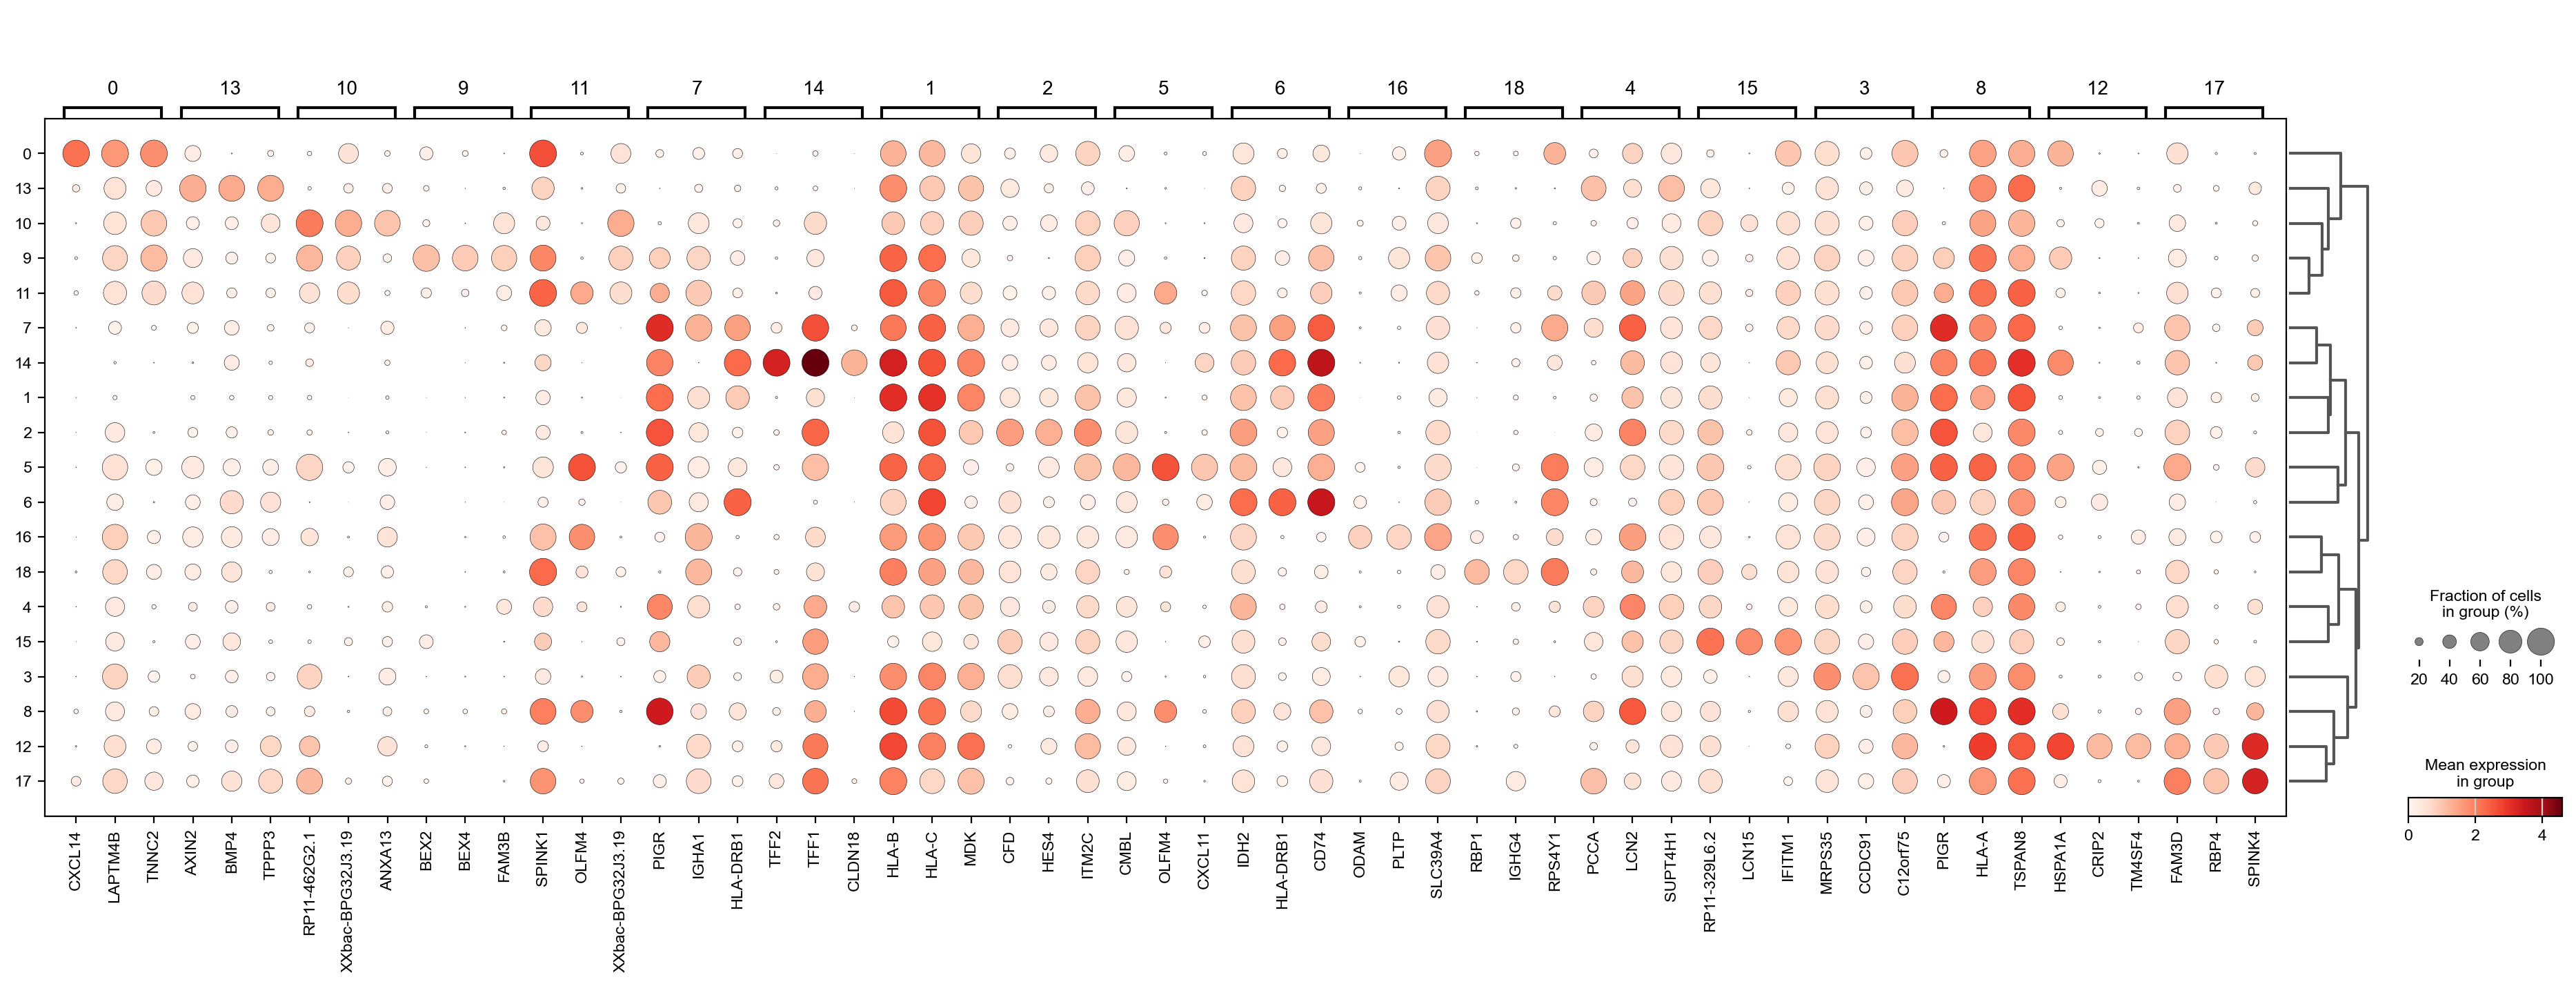

In [69]:
sc.tl.dendrogram(adata,groupby="leiden", n_pcs=40)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)#,key="rank_genes_groups_filtered")

In [70]:
sigFile = "geneSigs/simpLUADcs.csv"
sigGenes = pd.read_csv(sigFile)
hpcs = sigGenes["HPCS"]

In [71]:
sc.tl.score_genes(adata, hpcs, score_name="HPCS_score")

computing score 'HPCS_score'
    finished: added
    'HPCS_score', score of gene set (adata.obs).
    1040 total control genes are used. (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

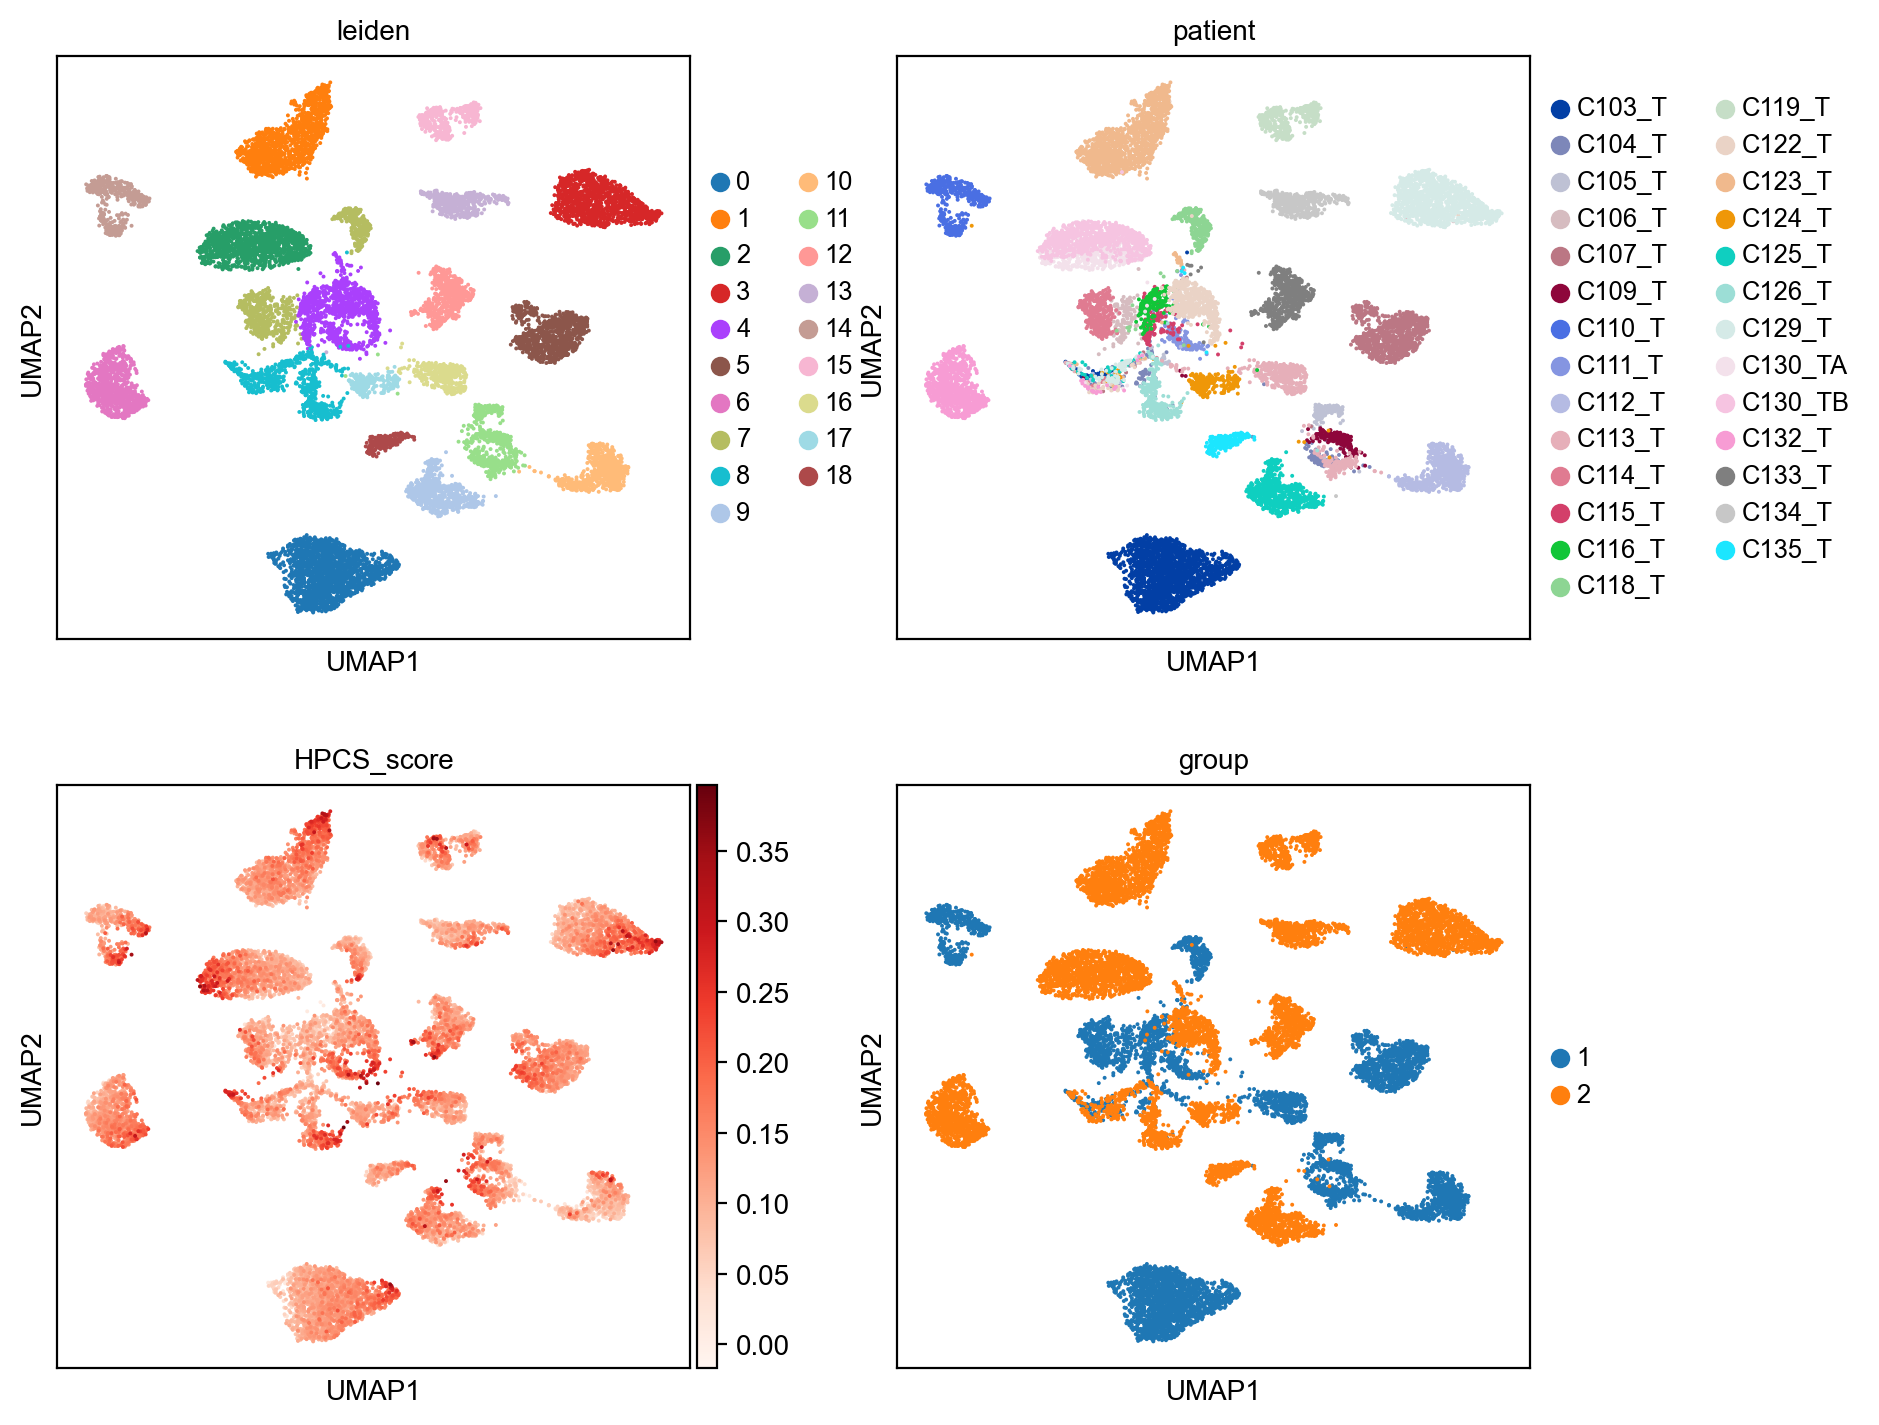

In [77]:
sc.pl.umap(adata, color=["leiden","patient","HPCS_score","group"],ncols=2, cmap="Reds")

In [74]:
resultsFile

'write/Pelka2021_Colorectal.h5ad'

In [76]:
adata.write(resultsFile)
adata

AnnData object with n_obs × n_vars = 14944 × 1706
    obs: 'sample', 'cell_type', 'cell_subtype', 'sample_type', 'HistologicTypeSimple', 'MMR_IHC', 'MMRStatus', 'MLH1Status', 'MMRMLH1Tumor', 'TissueSite_detailed', 'TissueSiteSimple', 'HistologicGrade_detailed', 'HistologicGradeSimple', 'TumorStage', 'NodeStatus_detailed', 'NodeStatusSimple', 'MetastasisStatus', 'TumorSize', 'SizeQuantile', 'PID', 'Sex', 'Age', 'Ethnicity', 'Race', 'complexity', 'group', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'patient', 'HPCS_score'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'patient_colors', 'rank_genes_groups', 'dendrogram_leide